# **Exploratory Data Analysis of Global Restaurant Trends**
***As a Data Analyst Intern at Cognifyz Technologies, I was tasked with performing exploratory data analysis (EDA) on a comprehensive global restaurant dataset. The dataset contained information on over 9,500 restaurants across 21 attributes.***

**The objective was to uncover meaningful patterns and insights related to  the following points:**

> - Common cuisines
> - City with the highest number of restaurants
> - Price Range Distribution
> - Geographic distribution of restaurants 
> - Restaurant Reviews and Ratings
> - Price Range with respect to  Online Delivery and Table Booking and so on.


**Using tools such as Python, Pandas, Matplotlib, Seaborn, and statistical analysis, I conducted detailed examinations across various dimensions of the dataset, from cuisine popularity and online delivery to pricing trends, user ratings, sentiment analysis of reviews and others.**


## Procedure for This Project
1. Data Understanding & Objective Definition
> Gained a clear understanding of the dataset and identified key business questions to address through analysis.

2. Data Cleaning & Structuring
> Preprocessed the data by handling missing values, correcting data types, and organizing the dataset into a structured format suitable for analysis.

3. Exploratory Data Analysis & Visualization
> Conducted in-depth analysis using statistical summaries and visualizations to uncover trends, patterns, and relationships within the data.

4. Insight Generation for Stakeholders
> Summarized actionable insights aimed at supporting decision-making for sellers and manufacturers, focusing on sales trends, product performance, and customer behavior.

# Imorting important libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
from datetime import datetime 
import plotly.express as px
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
df=pd.read_csv('Dataset.csv')

## **Basic dataset observation**

In [3]:
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                    Japanese  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  

[2 rows x 21 columns]

In [154]:
#Observe the shape(number of rows and columns) of your dataset
df.shape

(9551, 21)

- The data set has 9551 rows(entries) and 21 columns which showed that 9551 restaurants including the branches are included in this dataset.

In [95]:
df['Country Code'].nunique()

15

In [155]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

> - **The data set has 9 missing values in the Cuisines column**

In [156]:
#let's see the rows with null values
df[df['Cuisines'].isna()]

Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville                51 W Main St, Dahlonega, GA 30533   
328           Macon                   543 Cherry St, Macon, GA 31201   
346          Miller             109 N Broadway Ave, Miller, SD 57362   
368         Orlando  215 South Orlando Avenue, Winter Park, FL 32789   
418  Rest of Hawaii             933 Kapahulu Ave, Honolulu, HI 96816   
455        Savannah          1311 Butler Ave, Tybee Island, GA 31328   

         Locality         Locality Verbose   Longitude   Latitude Cuisines  \
84         Albany           Albany, Albany  -84.154000  31.577200      NaN   
87         Albany           Albany, Albany  -84.175900  31.588200      NaN   
94         Albany           Albany, Albany  -84.153400  31.575100      NaN   
297     Dahlonega   Dahlonega, Gainesville  -83.985800  34.531800      NaN   
328         Macon             Macon, Macon  -83.627979  32.836410      NaN   
346        Miller           Miller, Miller  -98.989100  44.515800      NaN   
368   Winter Park     Winter Park, Orlando  -81.365260  28.596682      NaN   
418       Kaimuki  Kaimuki, Rest of Hawaii -157.813432  21.284586      NaN   
455  Tybee Island   Tybee Island, Savannah  -80.848297  31.995810      NaN   

     ...   Currency Has Table booking Has Online delivery Is delivering now  \
84   ...  Dollar($)                No                  No                No   
87   ...  Dollar($)                No                  No                No   
94   ...  Dollar($)                No                  No                No   
297  ...  Dollar($)                No                  No                No   
328  ...  Dollar($)                No                  No                No   
346  ...  Dollar($)                No                  No                No   
368  ...  Dollar($)                No                  No                No   
418  ...  Dollar($)                No                  No                No   
455  ...  Dollar($)                No                  No                No   

    Switch to order menu Price range  Aggregate rating  Rating color  \
84                    No           1               3.4        Orange   
87                    No           1               3.4        Orange   
94                    No           1               3.9        Yellow   
297                   No           3               3.9        Yellow   
328                   No           3               3.8        Yellow   
346                   No           1               3.4        Orange   
368                   No           3               4.4         Green   
418                   No           1               4.7    Dark Green   
455                   No           1               3.9        Yellow   

    Rating text Votes  
84      Average    34  
87      Average    36  
94         Good   160  
297        Good   209  
328        Good   102  
346     Average    11  
368   Very Good  1158  
418   Excellent   707  
455        Good   309  

[9 rows x 21 columns]

**As shown above, the missing values appear across different restaurants and do not follow a consistent pattern. Therefore, it is difficult to make accurate imputations or suggestions. It is more appropriate to drop the rows with missing values in the 'Cuisines' column.**

In [4]:
#drop the rows with missing 'Cuisines' column
df.dropna(inplace=True)

In [5]:
#verify it
df.Cuisines.isna().sum()

0

In [6]:
#check for any duplication in the dataset
df.duplicated().sum()

0

In [7]:
df.shape

(9542, 21)

> - **The current dataset has 9542 rows and 21 columns**
> -  **There is no duplications and missing values in the current dataset**

## ***The dataset contains corrupted or misencoded version of  different values across some columns***
> **The sensitive columns for further analysis to be cleaned are 'Restaurant Name','City' and 'Cuisines'. Therefore, let we find and clear corrupted or misencoded version in those columns.**

**Observe  corrupted or misencoded version across 'Restaurant Name','City' and 'Cuisines'**

In [8]:
df[(df[['Restaurant Name','City','Cuisines']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['Restaurant Name','City','Cuisines']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Restaurant ID           Restaurant Name  Country Code       City  \
22          6600681               Chez Michou            30  Bras�_lia   
23          6601005       Caf�� Daniel Briand            30  Bras�_lia   
24          6600292  Casa do Biscoito Mineiro            30  Bras�_lia   
25          6600441                     Maori            30  Bras�_lia   
26          6600970            Pizza �� Bessa            30  Bras�_lia   
...             ...                       ...           ...        ...   
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
22    SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia    Asa Norte   
23     SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia    Asa Norte   
24    SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...    Asa Norte   
25      CLN 110, Bloco D, Loja 28, Asa Norte, Bras�_lia    Asa Norte   
26        SCS 214, Bloco C, Loja 40, Asa Sul, Bras�_lia      Asa Sul   
...                                                 ...          ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...     Karak�_y   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...    Ko��uyolu   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...         Moda   

            Locality Verbose  Longitude   Latitude  \
22      Asa Norte, Bras�_lia -47.881789 -15.764142   
23      Asa Norte, Bras�_lia -47.882667 -15.777500   
24      Asa Norte, Bras�_lia -47.882136 -15.757472   
25      Asa Norte, Bras�_lia -47.888167 -15.758833   
26        Asa Sul, Bras�_lia -47.915667 -15.831167   
...                      ...        ...        ...   
9546     Karak�_y, ��stanbul  28.977392  41.022793   
9547    Ko��uyolu, ��stanbul  29.041297  41.009847   
9548  Kuru�_e��me, ��stanbul  29.034640  41.055817   
9549  Kuru�_e��me, ��stanbul  29.036019  41.057979   
9550         Moda, ��stanbul  29.026016  40.984776   

                             Cuisines  ...            Currency  \
22                  Fast Food, French  ...  Brazilian Real(R$)   
23                               Cafe  ...  Brazilian Real(R$)   
24                             Bakery  ...  Brazilian Real(R$)   
25                          Brazilian  ...  Brazilian Real(R$)   
26                              Pizza  ...  Brazilian Real(R$)   
...                               ...  ...                 ...   
9546                          Turkish  ...    Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe  ...    Turkish Lira(TL)   
9548           Italian, World Cuisine  ...    Turkish Lira(TL)   
9549                  Restaurant Cafe  ...    Turkish Lira(TL)   
9550                             Cafe  ...    Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
22                  No                  No                No   
23                  No                  No                No   
24                  No                  No                No   
25                  No                  No                No   
26                  No                  No                No   
...                ...                 ...               ...   
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu Price range  Ag

> **There are 145 rows that contain ? across the selected columns**
> 
> **Let us see the 'Restaurant Name' column**

In [186]:
df[(df[['Restaurant Name']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['Restaurant Name']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Restaurant ID        Restaurant Name  Country Code       City  \
23          6601005    Caf�� Daniel Briand            30  Bras�_lia   
26          6600970         Pizza �� Bessa            30  Bras�_lia   
30          6600060         Sandubas Caf��            30  Bras�_lia   
36          6601862                 Tayp��            30  Bras�_lia   
38          6601158                Manzu��            30  Bras�_lia   
...             ...                    ...           ...        ...   
9542        5926979         Leman K�_lt�_r           208  ��stanbul   
9543        5916085           Dem Karak�_y           208  ��stanbul   
9544        5915547  Karak�_y G�_ll�_o��lu           208  ��stanbul   
9547        5908749           Ceviz A��ac۱           208  ��stanbul   
9549        5916112            A���k Kahve           208  ��stanbul   

                                                Address  \
23     SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia   
26        SCS 214, Bloco C, Loja 40, Asa Sul, Bras�_lia   
30    Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...   
36    Fashion Park, Shis Ql 17, Bloco G, Loja 208, L...   
38    Pont��o Lago Sul, SHIS 10, Lote 9, Lago Sul, B...   
...                                                 ...   
9542  Cafera��a Mahallesi, Ne��et �_mer Sokak, No 9/...   
9543  Kemanke�� Karamustafa Pa��a Mahallesi, Hoca Ta...   
9544  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   

                        Locality                       Locality Verbose  \
23                     Asa Norte                   Asa Norte, Bras�_lia   
26                       Asa Sul                     Asa Sul, Bras�_lia   
30                       Asa Sul                     Asa Sul, Bras�_lia   
36                      Lago Sul                    Lago Sul, Bras�_lia   
38    Pont��o Lago Sul, Lago Sul  Pont��o Lago Sul, Lago Sul, Bras�_lia   
...                          ...                                    ...   
9542             Kad۱k�_y Merkez             Kad۱k�_y Merkez, ��stanbul   
9543                    Karak�_y                    Karak�_y, ��stanbul   
9544                    Karak�_y                    Karak�_y, ��stanbul   
9547                   Ko��uyolu                   Ko��uyolu, ��stanbul   
9549                 Kuru�_e��me                 Kuru�_e��me, ��stanbul   

      Longitude   Latitude                         Cuisines  ...  \
23   -47.882667 -15.777500                             Cafe  ...   
26   -47.915667 -15.831167                            Pizza  ...   
30   -47.890167 -15.797000                  Brazilian, Cafe  ...   
36   -47.872359 -15.860621         Peruvian, Latin American  ...   
38   -47.872833 -15.825667                          Seafood  ...   
...         ...        ...                              ...  ...   
9542  29.022805  40.989705                  Restaurant Cafe  ...   
9543  28.978237  41.024633                             Cafe  ...   
9544  28.977636  41.022904                 Desserts, B�_rek  ...   
9547  29.041297  41.009847  World Cuisine, Patisserie, Cafe  ...   
9549  29.036019  41.057979                  Restaurant Cafe  ...   

                Currency Has Table booking Has Online delivery  \
23    Brazilian Real(R$)                No                  No   
26    Brazilian Real(R$)                No                  No   
30    Brazilian Real(R$)                No                  No   
36    Brazilian Real(R$)                No                  No   
38    Brazilian Real(R$)                No                  No   
...                  ...               ...                 ...   
9542    Turkish Lira(TL)                No                  No   
9543    Turkish Lira(TL)                No                  No   
9544    Turkish Lira(TL)                No                  No   
9547    Turkish Lira(TL)                No                  No   


**There are 104 rows with misencoded version across 'Restaurant Name'**
> let we clean it.

In [9]:
df['Restaurant Name']= df['Restaurant Name'].replace({
    'Caf�� Daniel Briand': 'Café Daniel Briand',
    'Pizza �� Bessa': 'Pizza à Bessa',
    'Sandubas Caf��': 'Sandubas Café',    
    'Tayp��': 'Taypá',
    'Manzu��': 'Manzuá',
    'Leman K�_lt�_r': 'Leman Kültür',
    'Braseiro da G��vea':'Braseiro da Gávea',
    'Zaz�� Bistr�� Tropical':'Zazá Bistrô Tropical',
    'Fil�� de Ouro':'Filé de Ouro',
    'Apraz�_vel':'Aprazível',
    'Emirgan S�_ti��':'Emirgan Sütiş',
    'Terra�_o It��lia':'Terraço Itália',
    'Divino Fog��o':'Divino Fogão',
    'Esquina Mocot�_':'Esquina Mocotó',
    'Cev�_che Tapas Bar & Restaurant':'Ceviche Tapas Bar & Restaurant',
    'Caf�� Tu Tu Tango':'Café Tu Tu Tango',    
    "Hollerbach's Willow Tree Caf��": "Hollerbach's Willow Tree Café",
    'MoMo Caf�� - Courtyard By Marriott': 'MoMo Café - Courtyard By Marriott',
    'Caf�� Bogchi': 'Café Bogchi',
    'Caf�� Kitchen': 'Café Kitchen',
    'Gallery Caf�� - Hyatt Place': 'Gallery Café - Hyatt Place',
    "Longitude 77��03' Bar - Le Meridien Gurgaon": "Longitude 77°03' Bar - Le Meridien Gurgaon",
    'bu��no': 'buono',
    'Queens Caf��': 'Queens Café',
    'Caf�� Gramophone': 'Café Gramophone',
    'M Cr��me': 'M Crème',
    'West��ross': 'Westcross',
    "Chawla's�_": "Chawla's",
    'Caf�� Burger BC': 'Café Burger BC',
    'The Basement Caf��': 'The Basement Café',
    'Caf�� Riverrun': 'Café Riverrun',
    'Con�_u': 'Conçu',
    'Sahib��s Barbeque by Ohri��s': "Sahib's Barbeque by Ohri's",
    'Hobnob Gourmet Caf��bar': 'Hobnob Gourmet Cafébar',
    'Chemistry Caf��': 'Chemistry Café',
    'NESCAF� Illusions': 'NESCAFÉ Illusions',
    'It��s Sinful': "It's Sinful",
    'Caf�� MRP': 'Café MRP',
    'D�_ner Grill': 'Döner Grill',
    'Caf�� Healthilicious': 'Café Healthilicious',
    'LaBont��': 'LaBonte',
    'Chhalava - �__Lava': 'Chhalava - Lava',
    'The Walled City - Caf�� & Lounge': 'The Walled City - Café & Lounge',
    'Bon App��tit': 'Bon Appétit',
    'Cottage Caf�� by Smoothie factory': 'Cottage Café by Smoothie Factory',
    'Dialogue Lounge & Caf��': 'Dialogue Lounge & Café',
    "Ping's Caf�� Orient": "Ping's Café Orient",
    'Delhite P��tisserie': 'Delhite Pâtisserie',
    'Arabian & Turkish Caf��': 'Arabian & Turkish Café',
    'Die B�_ckerei': 'Die Bäckerei',
    'High Street Caf��': 'High Street Café',
    'The Junkyard Caf��': 'The Junkyard Café',
    'AMPM Caf�� & Bar': 'AMPM Café & Bar',
    'Caf�� Foreground': 'Café Foreground',
    "WTF - What's the Food?": "WTF - What's the Food?",
    'Rosart�� Chocolate': 'Rosarté Chocolate',
    'Caf�� Befikre': 'Café Befikre',
    'Caf�� 101': 'Café 101',
    'Tin Town Caf��': 'Tin Town Café',
    'Superstar Caf��': 'Superstar Café',
    'H�_agen-Dazs': 'Häagen-Dazs',
    'The Fashion Street Caf��': 'The Fashion Street Café',
    'Hearken Caf��': 'Hearken Café',
    'Remember Me Caf��': 'Remember Me Café',
    '4 Barrels Caf�� & Lounge': '4 Barrels Café & Lounge',
    'Caf�� Knosh - The Leela Ambience Convention Hotel': 'Café Knosh - The Leela Ambience Convention Hotel',
    'The Village Caf��': 'The Village Café',
    'Phonebooth Caf��': 'Phonebooth Café',
    'Caf�� Doo Ghoont': 'Café Doo Ghoont',
    'TBH ��� To Be Healthy': 'TBH — To Be Healthy',
    'They�_����': 'They',
    'Caff�� La Poya': 'Caffè La Poya',
    'More Than Caf��': 'More Than Café',
    'Elixir Health Caf��': 'Elixir Health Café',
    '#Urban Caf��': '#Urban Café',
    'The Chickmunks Caf��': 'The Chickmunks Café',
    'KBC�_': 'KBC',
    "Chef's Basket Pop Up Caf��": "Chef's Basket Pop Up Café",
    'Saut��ed Stories': 'Sautéed Stories',
    'Freshco - The Health Caf��': 'Freshco - The Health Café',
    'Eden Noodles Cafe �__·�_��_��_��': 'Eden Noodles Cafe',
    'Grand Caf�� & Beach': 'Grand Café & Beach',
    'Masaba��۱ Kebap�_۱s۱': 'Masabaş Kebapş',
    'Me��hur Tavac۱ Recep Usta': 'Meşhur Tavacı Recep Usta',
    '�ukura��a Sofras۱': 'Çukuraşa Sofrası',
    'Me��hur �_z�_elik Aspava': 'Meşhur Özçelik Aspava',
    'Y۱ld۱z Aspava': 'Yıldız Aspava',
    'Masaba��۱': 'Masabaş',
    'D�_vero��lu': 'Döveroğlu',
    'Pizza ��l Forno': 'Pizza al Forno',
    'Dem Karak�_y': 'Dem Karaköy',
    'Karak�_y G�_ll�_o��lu': 'Karaköy Güllüoğlu',
    'Ceviz A��ac۱': 'Ceviz Ağacı',
    'A���k Kahve': 'Aşık Kahve'    
})

> **Verify the cleaning**

In [188]:
df[(df[['Restaurant Name']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['Restaurant Name']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Restaurant ID         Restaurant Name  Country Code       City  \
6763         309783  WTF - What's the Food?             1  New Delhi   

                                                Address Locality  \
6763  Plot 171, Opposite Maharaja Agrasen Institute ...   Rohini   

       Locality Verbose  Longitude   Latitude  \
6763  Rohini, New Delhi  77.065217  28.719617   

                              Cuisines  ...            Currency  \
6763  North Indian, Chinese, Fast Food  ...  Indian Rupees(Rs.)   

     Has Table booking Has Online delivery Is delivering now  \
6763                No                 Yes                No   

     Switch to order menu Price range  Aggregate rating  Rating color  \
6763                   No           1               3.5        Yellow   

     Rating text Votes  
6763        Good    83  

[1 rows x 21 columns]

**There is a column with Restaurant Name "WTF - What's the Food?", drop it**

In [10]:
df.drop(df[df['Restaurant Name']=="WTF - What's the Food?"].index,inplace=True)

> **Verify the cleaning**

In [11]:
df[(df[['Restaurant Name']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['Restaurant Name']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]

> **Let us see the 'City' column**

In [191]:
df[(df[['City']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['City']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))].head()

Restaurant ID           Restaurant Name  Country Code       City  \
22        6600681               Chez Michou            30  Bras�_lia   
23        6601005        Café Daniel Briand            30  Bras�_lia   
24        6600292  Casa do Biscoito Mineiro            30  Bras�_lia   
25        6600441                     Maori            30  Bras�_lia   
26        6600970             Pizza à Bessa            30  Bras�_lia   

                                              Address   Locality  \
22  SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia  Asa Norte   
23   SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia  Asa Norte   
24  SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...  Asa Norte   
25    CLN 110, Bloco D, Loja 28, Asa Norte, Bras�_lia  Asa Norte   
26      SCS 214, Bloco C, Loja 40, Asa Sul, Bras�_lia    Asa Sul   

        Locality Verbose  Longitude   Latitude           Cuisines  ...  \
22  Asa Norte, Bras�_lia -47.881789 -15.764142  Fast Food, French  ...   
23  Asa Norte, Bras�_lia -47.882667 -15.777500               Cafe  ...   
24  Asa Norte, Bras�_lia -47.882136 -15.757472             Bakery  ...   
25  Asa Norte, Bras�_lia -47.888167 -15.758833          Brazilian  ...   
26    Asa Sul, Bras�_lia -47.915667 -15.831167              Pizza  ...   

              Currency Has Table booking Has Online delivery  \
22  Brazilian Real(R$)                No                  No   
23  Brazilian Real(R$)                No                  No   
24  Brazilian Real(R$)                No                  No   
25  Brazilian Real(R$)                No                  No   
26  Brazilian Real(R$)                No                  No   

   Is delivering now Switch to order menu Price range  Aggregate rating  \
22                No                   No           2               3.0   
23                No                   No           1               3.8   
24                No                   No           2               3.7   
25                No                   No           3               3.8   
26                No                   No           2               3.2   

    Rating color Rating text Votes  
22        Orange     Average     6  
23        Yellow        Good     9  
24        Yellow        Good    11  
25        Yellow        Good    11  
26        Orange     Average    11  

[5 rows x 21 columns]

**There are 5 rows with misencoded version across 'City' column**
> let we clean it.

In [12]:
df['City']= df.City.replace({"Bras�_lia":"Brasília",
                             "��stanbul":"İstanbul",
                             'S��o Paulo':'São Paulo'                                                     
                            })

> **Verfy the cleaning**

In [13]:
df[(df[['City']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['City']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]

> **Let us see the 'Cuisines' column**

In [14]:
df[(df[['Cuisines']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['Cuisines']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Restaurant ID    Restaurant Name  Country Code      City  \
9530        6001757      Yıldız Aspava           208    Ankara   
9544        5915547  Karaköy Güllüoğlu           208  İstanbul   

                                                Address       Locality  \
9530  K�_�_�_k Esat Mahallesi, Esat Caddesi, No 110/...  K�_�_�_k Esat   
9544  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...       Karak�_y   

           Locality Verbose  Longitude   Latitude  \
9530  K�_�_�_k Esat, Ankara  32.866608  39.906569   
9544    Karak�_y, ��stanbul  28.977636  41.022904   

                          Cuisines  ...          Currency Has Table booking  \
9530  Kebab, Turkish Pizza, D�_ner  ...  Turkish Lira(TL)                No   
9544              Desserts, B�_rek  ...  Turkish Lira(TL)                No   

     Has Online delivery Is delivering now Switch to order menu Price range  \
9530                  No                No                   No           2   
9544                  No                No                   No           2   

      Aggregate rating  Rating color Rating text Votes  
9530               4.4         Green   Very Good    72  
9544               4.7    Dark Green   Excellent  1305  

[2 rows x 21 columns]

**There are 2 rows with misencoded version across the 'Cuisines' column**
> let we clean it.

In [15]:
df['Cuisines']= df.Cuisines.replace({"B�_rek":"Börek","Kebab, Turkish Pizza, D�_ner": "Kebab, Turkish Pizza, Döner","Desserts, B�_rek": "Desserts, Börek"})

> **Verify the cleaning**

In [16]:
df[(df[['Cuisines']].astype(str).apply(lambda x: x.str.contains(r'\?', regex=True)).any(axis=1)) |(df[['Cuisines']].astype(str).apply(lambda x: x.str.contains(r'\�', regex=True)).any(axis=1))]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]

**After perforimng those cleanings we have with 9541 rows and 21 columns which is displayed below**

In [23]:
df.shape

(9541, 21)

**Make a rough observation on restaurant chains**

In [24]:
df['Restaurant Name'].value_counts(ascending=False)

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7434, dtype: int64

In [17]:
df['Restaurant Name'].nunique()

7434

**The above results highlight that**

> Among the 9,541 restaurants, only 7,434 have unique names, indicating that the remaining entries are part of restaurant chains or branches.

>> For instance, Café Coffee appears 83 times, representing 83 branches of the same chain.


In [207]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9541 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Is delivering now     9541 non-null   object 
 15  Switch to order menu  9541

In [208]:
# Basic dataset statistics
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.541000e+03   9541.000000  9541.000000  9541.000000   
mean    9.044216e+06     18.181008    64.273657    25.848231   
std     8.791973e+06     56.454284    41.199553    11.010632   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019310e+05      1.000000    77.081601    28.478650   
50%     6.003426e+06      1.000000    77.192035    28.570444   
75%     1.835266e+07      1.000000    77.282045    28.642704   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9541.000000  9541.000000       9541.000000   9541.000000  
mean            1200.404779     1.805052          2.665150    156.779792  
std            16129.587346     0.905573          1.516643    430.225207  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    130.000000  
max           800000.000000     4.000000          4.900000  10934.000000

**Based on the general dataset overview and descriptive statistics, the dataset contains no missing values or anomalies such as negative prices or vote counts.**

In [26]:
#Countries from where the restaurants are
df1=pd.DataFrame(df['Country Code'].value_counts())
df1.head()

count
Country Code       
1              8651
216             425
215              80
30               60
214              60

In [27]:
#percentage of restaurants from a single country with country code of 1
percentage_country_code_1=len(df[df['Country Code']==1])/len(df)*100
percentage_country_code_1

90.67183733361283

In [211]:
#percentage of restaurants from the two  countries from where most of the restaurants are
percentage_country_code_1_2=len(df[df['Country Code'].isin([1,216])])/len(df)*100
percentage_country_code_1_2

95.12629703385389

**As indicated by the above results, 90.67% of the restaurants are from India, and 95.13% are from India and the USA.**

 > - Therefore, the dataset may not be inclusive, and the analysis will be about the provided dataset and the result may not infer the overall global restaurants.

# Analysis

## Task 1: Top 3 Cuisines

**Q1. Determine the top three most common cuisines in the dataset.**

**We need to have each cuisine as a column and count them to find the frequency of cuisines to do so the Cuisines column must be converted into columns of each cuisine**


In [28]:
Cuisines=df.Cuisines.str.get_dummies(',')
Cuisines.head(2)

Afghani   African   American   Andhra   Arabian   Argentine   Armenian  \
0         0         0          0        0         0           0          0   
1         0         0          0        0         0           0          0   

    Asian   Assamese   Australian  ...  Tapas  Tea  Tex-Mex  Thai  Tibetan  \
0       0          0            0  ...      0    0        0     0        0   
1       0          0            0  ...      0    0        0     0        0   

   Turkish  Turkish Pizza  Vietnamese  Western  World Cuisine  
0        0              0           0        0              0  
1        0              0           0        0              0  

[2 rows x 249 columns]

In [29]:
Cuisines_count=Cuisines.sum().sort_values(ascending=False).head()
Cuisines_count.head()

North Indian     2991
 Chinese         1877
 Fast Food       1313
 North Indian     968
Chinese           855
dtype: int64

In [30]:
len(Cuisines.columns)

249

- **The above result showed that there is a space after the semicolon and so we have got two North Indian Cuisines, hence the space before any Cuisines must be removed and the conversion should be done as follows. The number of Cuisines, including the repeated ones is 249.**

In [31]:
# remove the white space after the semicolon and 
#create multiple columns from the Cuisines column for analysis purposes
df['Cuisines_new']=df.Cuisines.str.replace(', ',',')
df['Cuisines_new']=df.Cuisines_new.str.replace(' ,',',')
Cuisines_df=df.Cuisines_new.str.get_dummies(',')
Cuisines_df.head(2)

Afghani  African  American  Andhra  Arabian  Argentine  Armenian  Asian  \
0        0        0         0       0        0          0         0      0   
1        0        0         0       0        0          0         0      0   

   Asian Fusion  Assamese  ...  Teriyaki  Tex-Mex  Thai  Tibetan  Turkish  \
0             0         0  ...         0        0     0        0        0   
1             0         0  ...         0        0     0        0        0   

   Turkish Pizza  Vegetarian  Vietnamese  Western  World Cuisine  
0              0           0           0        0              0  
1              0           0           0        0              0  

[2 rows x 145 columns]

In [32]:
# Top 3 most common Cuisines
Cuisines_Count=Cuisines_df.sum().sort_values(ascending=False)
Top_Three_Cuisines=Cuisines_Count.head(3)
Top_Three_Cuisines

North Indian    3959
Chinese         2732
Fast Food       1985
dtype: int64

In [33]:
len(Cuisines_df.columns)

145

**After formatting the  Cuisines column, the repeated ones are removed and the number of Cuisines becomes 145, now we can visualize the top 3 most common Cuisines**

In [34]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

C:\Users\Tamirat\AppData\Local\Temp\ipykernel_10548\625897621.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')


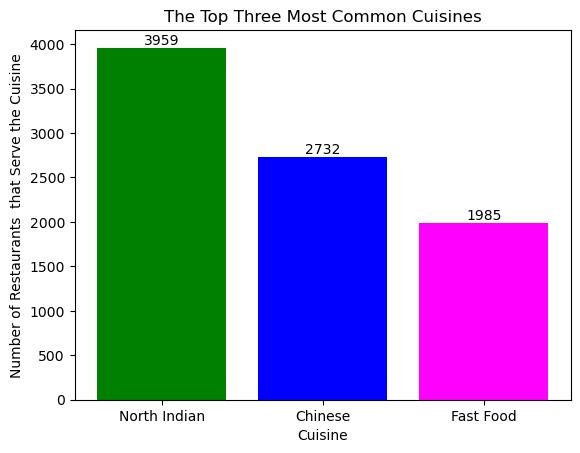

In [35]:
color=['green','blue','magenta']
plt.bar(x = Top_Three_Cuisines.index, height = Top_Three_Cuisines,color=color)
addlabels(Top_Three_Cuisines.index, Top_Three_Cuisines, Top_Three_Cuisines)
plt.plot()
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants  that Serve the Cuisine')
plt.title('The Top Three Most Common Cuisines')
plt.show();

**It is clearly shown that the top 3 most common Cuisines are North Indian, Chinese and Fast Food**

**Q2. Calculate the percentage of restaurants that serve each of the top cuisines.**

In [36]:
# restaurants that serve at least one of the top three most common cuisines
Top_cuisines_restaurants=df[df.Cuisines_new.str.contains('Chinese',
                                                         na=False, regex=True) |df.Cuisines_new.str.contains('Fast Food', na=False,
                                                        regex=True)|df.Cuisines_new.str.contains('North Indian', na=False, regex=True)]
Top_cuisines_restaurants.head(2)

Restaurant ID Restaurant Name  Country Code              City  \
5        18189371    Din Tai Fung           162  Mandaluyong City   
22        6600681     Chez Michou            30          Brasília   

                                              Address  \
5   Ground Floor, Mega Fashion Hall, SM Megamall, ...   
22  SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia   

                                  Locality  \
5   SM Megamall, Ortigas, Mandaluyong City   
22                               Asa Norte   

                                     Locality Verbose   Longitude   Latitude  \
5   SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056314  14.583764   
22                               Asa Norte, Bras�_lia  -47.881789 -15.764142   

             Cuisines  ...  Has Table booking Has Online delivery  \
5             Chinese  ...                 No                  No   
22  Fast Food, French  ...                 No                  No   

   Is delivering now Switch to order menu Price range Aggregate rating  \
5                 No                   No           3              4.4   
22                No                   No           2              3.0   

    Rating color  Rating text Votes      Cuisines_new  
5          Green    Very Good   336           Chinese  
22        Orange      Average     6  Fast Food,French  

[2 rows x 22 columns]

In [37]:
# percentage of restaurants that serve at least one  of the top cuisines 
Top_cuisines_restaurants_perc=len(Top_cuisines_restaurants)/len(df)*100
Top_cuisines_restaurants_perc

64.79404674562414

**64.8 % of the Restaurants serve at least one of the top three most common cuisines**

In [38]:
# restaurants that serve all of the top three most common cuisines

Top_all_cuisines_restaurants=df[df.Cuisines_new.str.contains('Chinese',
                                                         na=False, regex=True) &df.Cuisines_new.str.contains('Fast Food', na=False,
                                                        regex=True)&df.Cuisines_new.str.contains('North Indian', na=False, regex=True)]
Top_all_cuisines_restaurants.head(2)

Restaurant ID   Restaurant Name  Country Code       City  \
656         110237  Kabir Restaurant             1  Ahmedabad   
696        2200149  Shudh Restaurant             1   Amritsar   

                                               Address   Locality  \
656  JB Tower, Opposite Doordarshan Kendra, Drive I...    Gurukul   
696  Opposite Gurudwara Saragarhi, Near Dharm Singh...  Town Hall   

        Locality Verbose  Longitude   Latitude  \
656   Gurukul, Ahmedabad  72.523965  23.048505   
696  Town Hall, Amritsar  74.879814  31.624047   

                                              Cuisines  ...  \
656  North Indian, Chinese, Continental, Desserts, ...  ...   
696     North Indian, South Indian, Chinese, Fast Food  ...   

     Has Table booking Has Online delivery Is delivering now  \
656                 No                 Yes                No   
696                 No                  No                No   

    Switch to order menu Price range Aggregate rating  Rating color  \
656                   No           2              3.8        Yellow   
696                   No           2              3.4        Orange   

     Rating text Votes                                       Cuisines_new  
656         Good   432  North Indian,Chinese,Continental,Desserts,Fast...  
696      Average    44        North Indian,South Indian,Chinese,Fast Food  

[2 rows x 22 columns]

In [39]:
# percentage of restaurants that serve each of the top cuisines counting all brances.
Top_all_cuisines_restaurants_perc=len(Top_all_cuisines_restaurants)/len(df)*100
Top_all_cuisines_restaurants_perc

2.4630541871921183

**2.46 % of the Restaurants serve all  the top three most common cuisines**

In [40]:
#  the percentage of restaurants that serve each of the top cuisine
Top_cuisine_Restaurant_percentage={}
for cuisine in ['Chinese','Fast Food','North Indian']:
    cu_df=df[df.Cuisines_new.str.contains(cuisine, na=False, regex=True)]
    Top_cuisine_Restaurant_percentage[cuisine]=len(cu_df)/len(df)*100

Top_cuisine_Restaurant_percentage

{'Chinese': 28.634315061314325,
 'Fast Food': 20.815428152185305,
 'North Indian': 41.49460224295147}

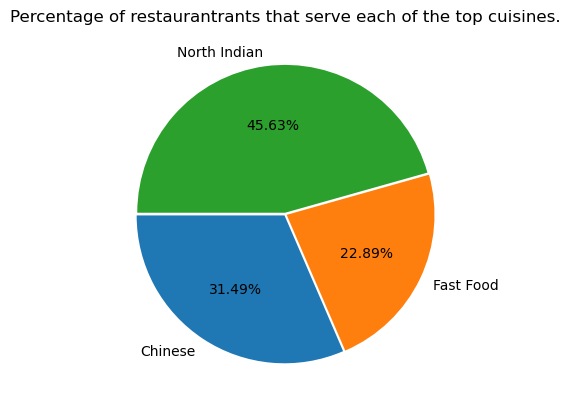

In [41]:
# pie chart plot
plt.title('Percentage of restaurantrants that serve each of the top cuisines.')
plt.pie(Top_cuisine_Restaurant_percentage.values(),labels=Top_cuisine_Restaurant_percentage.keys(),autopct='%0.2f%%',explode=[0.01,0.01,0.01],startangle=180)
plt.show()

## Task 2: City Analysis

**Q1. Identify the city with the highest number of restaurants in the dataset**.

In [42]:
#count of restaurants in each city
City_Restaurant_counts= df.groupby('City').size().sort_values(ascending=False).head(3)
City_Restaurant_counts

City
New Delhi    5472
Gurgaon      1118
Noida        1080
dtype: int64

C:\Users\Tamirat\AppData\Local\Temp\ipykernel_10548\625897621.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')


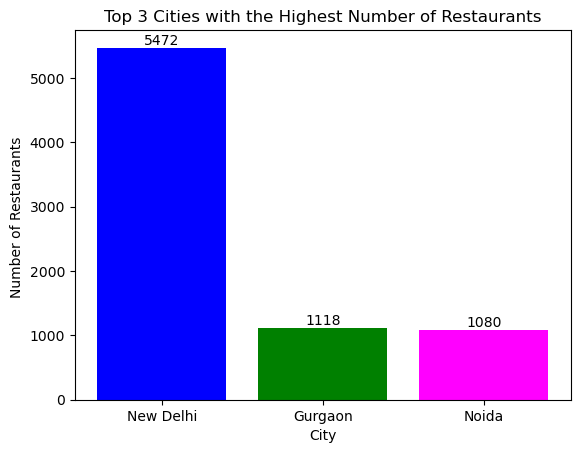

In [43]:
color=['blue','green','magenta']
plt.bar(x = City_Restaurant_counts.index, height = City_Restaurant_counts,color=color)
addlabels(City_Restaurant_counts.index, City_Restaurant_counts, City_Restaurant_counts)
plt.plot()
plt.xlabel('City')
plt.ylabel('Number of Restaurants ')
plt.title('Top 3 Cities with the Highest Number of Restaurants')
plt.show();

**New Delhi which has 5473 restaurants is the city with the highest number of restaurants followed by Gurgaon and Noida**

**Q2. Calculate the average rating for restaurants in each city**.

In [44]:
# average rating of restaurants in eachcity
Rating_City_Rest=df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
Rating_City_Rest.head()

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64

- **The average rating of restaurants is calculated above and it clearly showed that Inner City is the one with restaurants with the highest average rating which is 4.9 .**

## Task 3: Price Range Distribution

**Q1: Create a histogram or bar chart to 
visualize the distribution of price range 
among the restaurant**s.

In [45]:
# distribution of price ranges among the restaurants
price_catagory=df.groupby('Price range').size().sort_values(ascending=False)
price_catagory

Price range
1    4437
2    3113
3    1405
4     586
dtype: int64

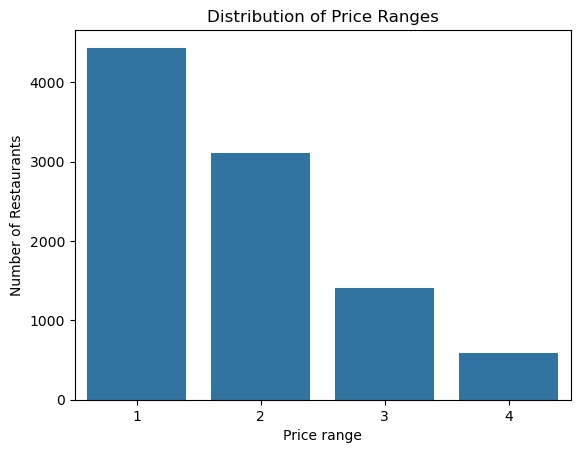

In [46]:
# Bar plot distribution of price ranges among the restaurants.
sns.barplot(x=price_catagory.index,y=price_catagory)

plt.ylabel('Number of Restaurants');
plt.title('Distribution of Price Ranges');

**The number of restaurants drastically decreases as price range increases**

**Q2: Calculate the percentage of restaurants 
in each price range categor**y

In [47]:
# percentage of restaurants in each price range category.

per_of_rest_price_catagory=df['Price range'].value_counts(normalize=True).sort_values(ascending= False)*100
per_of_rest_price_catagory

Price range
1    46.504559
2    32.627607
3    14.725920
4     6.141914
Name: proportion, dtype: float64

**The maximum number/percentage of the grestaurants which accounts 46.5 % is under price range 1 followed by priceranges 2,3  and 4 respectively**

## Task 4: Online Delivery

**Q1: Determine the percentage of restaurants that offer online delivery**.

In [48]:
# percentage of restaurants that offer online delivery.
online_delivery=df['Has Online delivery'].value_counts(normalize=True).sort_values(ascending= False)*100
online_delivery

Has Online delivery
No     74.32135
Yes    25.67865
Name: proportion, dtype: float64

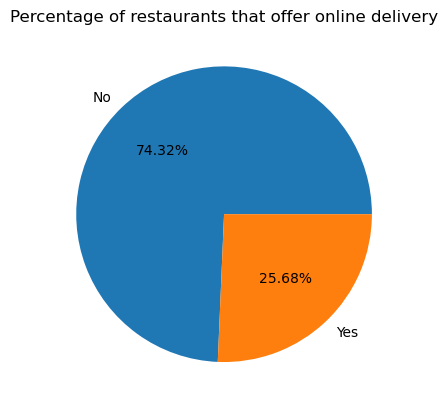

In [49]:
# pie chart plot
plt.title('Percentage of restaurants that offer online delivery')
plt.pie(online_delivery,labels=online_delivery.index,autopct='%0.2f%%')
plt.show()

**25.68% of the Restaurants in this dataset has an online delivery.**

**Q2: Compare the average ratings of restaurants with and without online delivery**.

In [50]:
#  average ratings of restaurants with and without online delivery.
online_delivery_based_average_rating=df.groupby('Has Online delivery')['Aggregate rating'].mean().sort_values(ascending=False)
online_delivery_based_average_rating

Has Online delivery
Yes    3.248735
No     2.463517
Name: Aggregate rating, dtype: float64

**The restaurants with online delivery has 3.25 average rating which is higher than the restaurants without online delivery which has an average ratiing of 2.47.**

# **Level 2**

## Task 1: Restaurant Ratings

**Q1: Analyze distribution of aggregate ratings and determine the most common rating range**

In [51]:
#distribution of aggregate ratings .
aggregate_ratings_dis=df['Aggregate rating'].value_counts().sort_values(ascending= False)
aggregate_ratings_dis.head()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
Name: count, dtype: int64

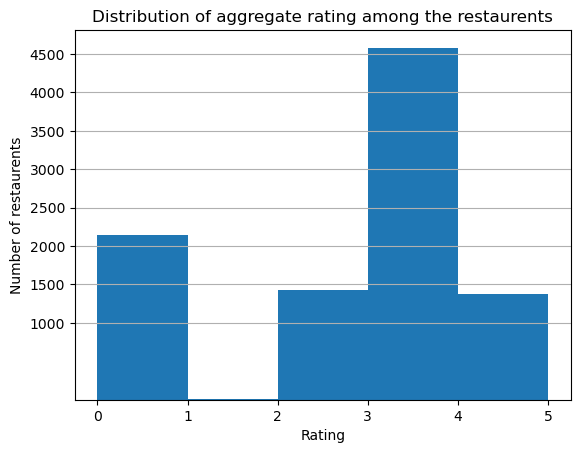

In [52]:
# Histogram of Aggregate rating among the restaurents
k=range(1000,5000,500)
plt.hist(df['Aggregate rating'],bins=range(0,6))
plt.xlabel("Rating")
plt.ylabel("Number of restaurents")
plt.title('Distribution of aggregate rating among the restaurents')
plt.yticks(k)
plt.grid(axis='y')
plt.show()

- **The rating distribution/frequency is high between 3 and 4 followed by [0,1], [2,3],[4,5] respectively. Note the lowest rating count is between 1 and 2**

**Q2: Calculate the average number of votes received by restaurants**.

In [53]:
# average number of votes average number of votes received by restaurants.received by restaurants.
Average_votes_per_rest=df.groupby('Restaurant Name')['Votes'].mean().sort_values(ascending=False)
Average_votes_per_rest.head(10)

Restaurant Name
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
BarBQ                5288.0
Warehouse Cafe       4914.0
Truffles             4841.0
Mocambo              4464.0
Gulati               4373.0
Name: Votes, dtype: float64

**The top 3 highest number of votes are given to Toit, Hauz Khas Social and Peter Cat respectively**

In [54]:
#overall average votes
overall_average_votes=df['Votes'].mean()
overall_average_votes

156.7797924745834

In [245]:
restaurants_below_overall_average=Average_votes_per_rest[Average_votes_per_rest<overall_average_votes]
restaurants_below_overall_average

Restaurant Name
Texas Roadhouse                             156.6
Tokyo Japanese Steak House                  156.0
Spindrift                                   156.0
Theo Yianni's Authentic Greek Restaurant    156.0
Litti.In                                    156.0
                                            ...  
Shahi Hyderbadi Biryani                       0.0
Cafe Lounge                                   0.0
Aggarwal Sweets Corner                        0.0
Shahi Chicken Point                           0.0
Spices Affair                                 0.0
Name: Votes, Length: 5810, dtype: float64

In [108]:
# percentage of restaurants below the average votes
len(restaurants_below_overall_average)/len(Average_votes_per_rest)*100

78.1497915826274

## Task 2: Cuisine Combination

**Q1: Identify the most common combinations of cuisines in the dataset.**

>> **top 5 most common combinations, Only for two at a time**

In [246]:
from collections import Counter
from itertools import combinations

count = Counter()

for row in df['Cuisines_new']:
    row_list = row.split(',')
    # Use frozenset to make pairs unordered
    pair_sets = [frozenset(pair) for pair in combinations(row_list, 2)]
    count.update(pair_sets)
d={}
for pair, value in count.most_common(5):
    m=tuple(pair)
    g=m[0]+' & '+m[1]
    d[g]=value

data={'Cuisines':d.keys(),'Counts':d.values()}
Top_five_combinations=pd.DataFrame(data)
Top_five_combinations

Cuisines  Counts
0      North Indian & Chinese    1783
1      Mughlai & North Indian     832
2    Fast Food & North Indian     484
3  North Indian & Continental     468
4         Fast Food & Chinese     465

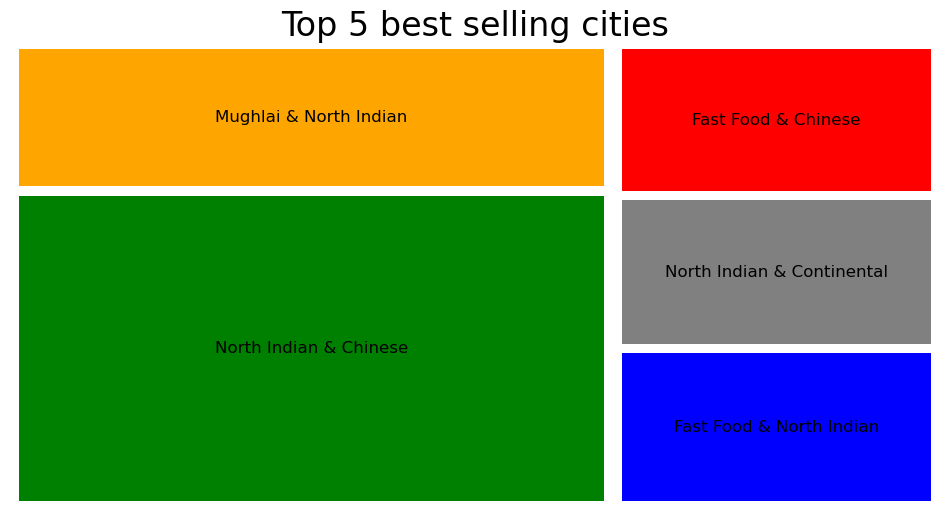

In [247]:
plt.figure(figsize=(12, 6)) 
# we don't require the axis values so lets remove it 
plt.axis("off") 
axis = squarify.plot(Top_five_combinations['Counts'], 
                     label=Top_five_combinations['Cuisines'], 
                     color=['green', 'orange','blue','gray','red'], 
                     pad=1, 
                     text_kwargs={'fontsize': 12}) 
axis.set_title("Top 5 best selling cities", fontsize=24);
plt.savefig("best_selling_states.png", dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Cuisine Combinations')

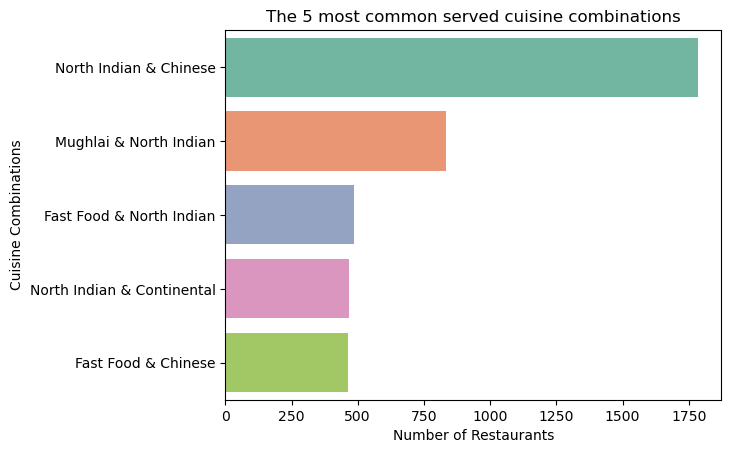

In [248]:
# it can be also visualize using bar chart as
sns.barplot(x=d.values(),y=d.keys(),palette='Set2',hue=d.keys());
plt.title('The 5 most common served cuisine combinations')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Combinations')

>> **top 5 most common combinations, 3,4,5 Cuisines at a time**

In [249]:
from collections import Counter
from itertools import combinations
for num in range(3,6):
    count = Counter()
    
    print(f"Taking {num} Cuisines at a time:")
    for row in df['Cuisines_new']:
        row_list = row.split(',')
        # Use frozenset to make pairs unordered
        pair_sets = [frozenset(pair) for pair in combinations(row_list, num)]
        count.update(pair_sets)
    d={}
    for pair, value in count.most_common(5):
        m=tuple(pair)
        g=m[0]+' & '+m[1]
        d[g]=value
    
    data={'Cuisines':d.keys(),'Counts':d.values()}
    Top_five_combinations=pd.DataFrame(data)
    print("\n",Top_five_combinations,"\n")

Taking 3 Cuisines at a time:

                    Cuisines  Counts
0    Mughlai & North Indian     365
1    North Indian & Chinese     253
2  Fast Food & North Indian     235
3    Italian & North Indian     163 

Taking 4 Cuisines at a time:

                    Cuisines  Counts
0  Fast Food & North Indian      78
1     Mithai & North Indian      67
2    North Indian & Chinese      64
3         Fast Food & Salad      63 

Taking 5 Cuisines at a time:

                      Cuisines  Counts
0  Street Food & South Indian      52
1     Fast Food & Street Food      34
2    Fast Food & South Indian      39 



In [250]:
from collections import Counter
from itertools import combinations
import pandas as pd

count = Counter()

for row in df['Cuisines_new']:
    row_list = row.split(',')
    pair_sets = [frozenset(pair) for pair in combinations(row_list, 2)]
    count.update(pair_sets)

d = {}
for pair, value in count.items():
    if len(pair) == 2:  # Only include proper pairs
        sorted_pair = sorted(pair)
        g = f"{sorted_pair[0]} & {sorted_pair[1]}"
        d[g] = value

data = {'Cuisines': list(d.keys()), 'Counts': list(d.values())}
Top_five_combinations = pd.DataFrame(data)

Top_five_combinations = Top_five_combinations.sort_values(by='Counts', ascending=False)

Top_five_combinations

Cuisines  Counts
379       Chinese & North Indian    1783
366       Mughlai & North Indian     832
421     Fast Food & North Indian     484
408   Continental & North Indian     468
441          Chinese & Fast Food     465
...                          ...     ...
773                Andhra & Thai       1
212                Cafe & Fusion       1
776         Hyderabadi & Seafood       1
211             Fusion & Italian       1
1173        Cafe & World Cuisine       1

[1174 rows x 2 columns]

**Taking two cuisines at a time:**
> **Based on this dataset the restaurant counts that serve different cuisines combination ranges from 1 to 1782, the top 3 most common cuisine cominations are 'North Indian,Chinese', 'North Indian,Mughlai'	and 'North Indian,Fast Food' respectively.**

**Q2: Determine if certain cuisine combinations 
tend to have higher ratings**.

In [252]:
from collections import Counter
from itertools import combinations
import pandas as pd

count = Counter()

for row in df['Cuisines_new']:
    row_list = row.split(',')
    pair_sets = [frozenset(pair) for pair in combinations(row_list, 2)]
    count.update(pair_sets)

d = {}
l=[]
for pair, value in count.items():
    if len(pair) == 2:  # Only include proper pairs
        sorted_pair = sorted(pair)
        g = f"{sorted_pair[0]} & {sorted_pair[1]}"
        d[g] = value
        
        df1=df[(df['Cuisines_new'].str.contains(sorted_pair[0], case=False, na=False, regex=False))&(df['Cuisines_new'].str.contains(sorted_pair[0], case=False, na=False, regex=False))]
        y=df1['Aggregate rating'].mean()
        l.append(y)

data = {'Cuisines': list(d.keys()), 'Counts': list(d.values()),'Aggregate rating':l}
Top_five_combinations = pd.DataFrame(data)

Top_five_combinations = Top_five_combinations.sort_values(by='Aggregate rating', ascending=False)

Top_five_combinations

Cuisines  Counts  Aggregate rating
1170         Börek & Desserts       1          4.700000
992             Ramen & Sushi       1          4.500000
301         Dim Sum & Seafood       1          4.466667
266        Hawaiian & Seafood       4          4.412500
267          Hawaiian & Steak       3          4.412500
...                       ...     ...               ...
888        Armenian & Mughlai       2          1.300000
889   Armenian & North Indian       1          1.300000
469    Armenian & Continental       1          1.300000
470      Armenian & Fast Food       2          1.300000
465           Armenian & Cafe       1          1.300000

[1174 rows x 3 columns]

> **The top higher rating cuisine combinations are  Börek & Desserts, Ramen & Sushi and Ramen & Sushi respectively taking two at a time.**

# Task 3: Geographic Analysis

### Q1: Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [19]:
def chain_counter(x):
    return df['Restaurant Name'].value_counts()[x]

df['Chain_size']=df['Restaurant Name'].apply(chain_counter)
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes Chain_size  
0    Dark Green    Excellent   314          1  
1    Dark Green    Excellent   591          1  

[2 rows x 22 columns]

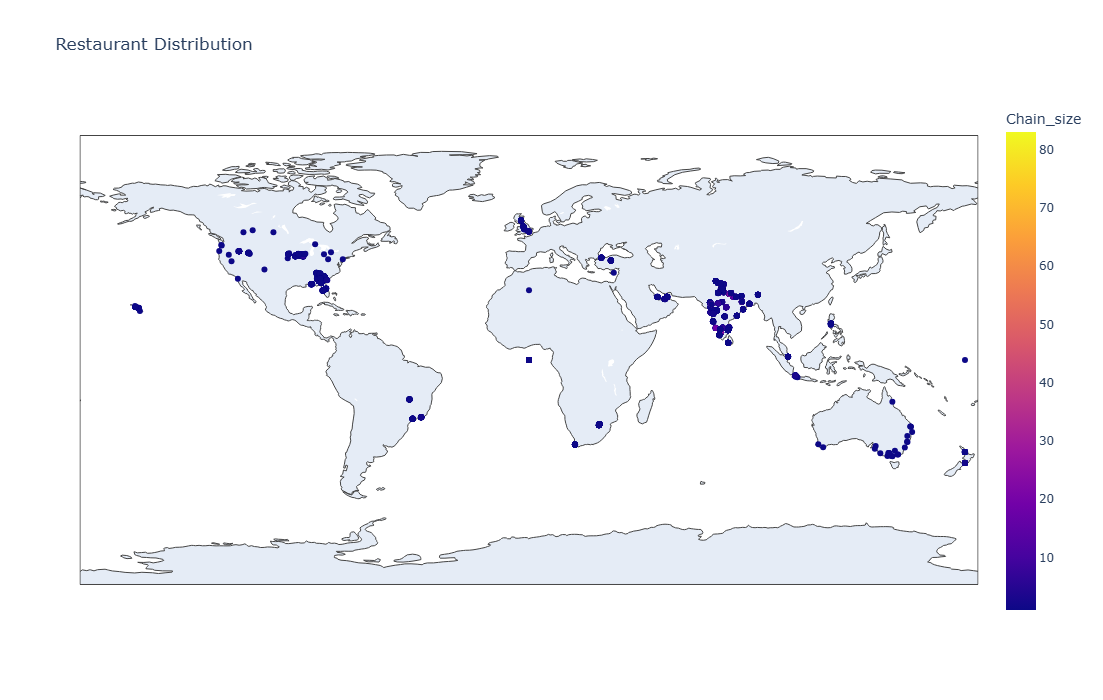

<Figure size 1500x1500 with 0 Axes>

In [20]:
# Create scatter map
plt.figure(figsize=(15,15))
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', #color_continuous_scale='reds',
                     hover_name='City', #size='Chain_size', 
                     hover_data=['Cuisines'],
                     color='Chain_size',
                     title='Restaurant Distribution')
fig.update_layout(height=700,width=1100)
fig.show()

**The above map indicates that the restaurants are distributed all over the world but Concentration in canada, Australian, USA and India.**

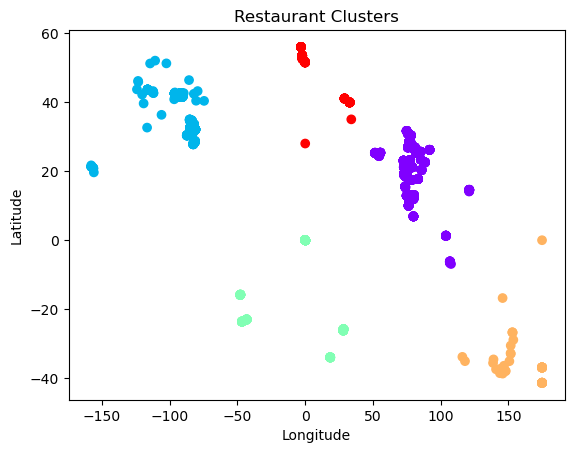

In [21]:
# clustering
X = df[['Latitude', 'Longitude']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='rainbow')
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Q2: Identify any patterns or clusters of 
restaurants in specific areas**.

In [263]:
df_above_10=df[df.Chain_size>10]
df_above_40=df[df.Chain_size>40]
len(df_above_40)

324

In [102]:
df_above_40.City.value_counts()

City
New Delhi     220
Noida          46
Gurgaon        41
Faridabad       9
Ghaziabad       3
Allahabad       2
Aurangabad      1
Ludhiana        1
Patna           1
Name: count, dtype: int64

**Restaurants with chains greater than 10 are concentrated in India with high concentration in New Delhi with 220 Restaurants followed by Noida and Gurgaon**

# **Level 3**

## **Task 1: Restaurant Reviews**

### Q1: **Analyze the text reviews to identify the most common positive and negative keywords.**

**The only text reviews in this dataset are "Rating Text" so this variable/column will be classified based on the following table**

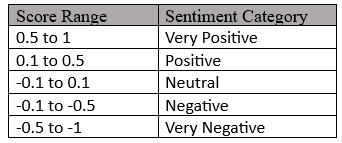



In [61]:
# let us define a function to classify the mentioned column to sentiment category as stated in the above table
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 3. Create the analyzer object
analyzer = SentimentIntensityAnalyzer()
def sentiment_catagory(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.5:
        return 'Very Positive'
    elif (scores['compound'] > 0.1) and (scores['compound'] < 0.5):
         return 'Positive'
    elif (scores['compound'] > -0.1) and (scores['compound'] < 0.1):
         return 'Neutral'
    elif (scores['compound'] > -0.5) and (scores['compound'] < -0.1):
         return 'Negative'
    else:
        return 'Very Negative'   

In [62]:
df['Sentiment']=df['Rating text'].apply(sentiment_catagory);
Sentiment_count=df['Sentiment'].value_counts()
Sentiment_count

Sentiment
Neutral          5882
Positive         3173
Very Positive     300
Negative          186
Name: count, dtype: int64

C:\Users\Tamirat\AppData\Local\Temp\ipykernel_10548\625897621.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



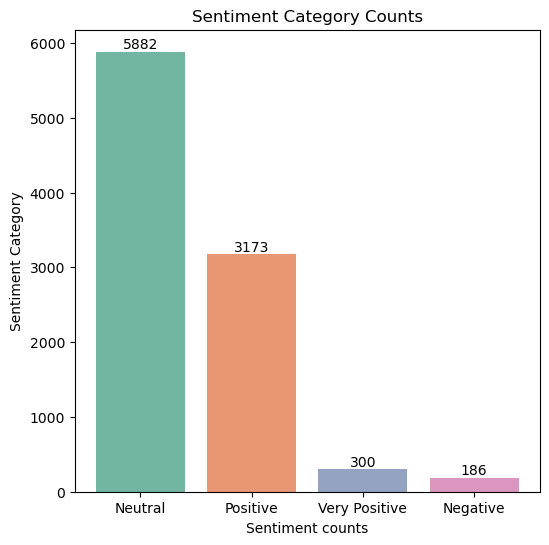

In [64]:
# plot of the sentiment catagory
plt.figure(figsize = (6, 6))
#color=['blue','green','magenta','black']
sns.barplot(x=Sentiment_count.index,y=Sentiment_count,palette='Set2',hue=Sentiment_count.index);


addlabels(Sentiment_count.index, Sentiment_count, Sentiment_count)
plt.plot()
plt.xlabel('Sentiment counts')
plt.ylabel('Sentiment Category')
plt.title('Sentiment Category Counts')
plt.show();

**As clearly shown above, the most common positive sentiment is positive and the most common negartive one is  negative**

**Q2: Calculate the average length of reviews and explore if there is a relationship between review length and rating.**

In [66]:
df_analyze=df[['Rating text','Aggregate rating']].copy()
df_analyze['Review Length']=df_analyze['Rating text'].apply(lambda x: len(str(x)))
ave_rev_len=df_analyze.groupby('Aggregate rating')['Review Length'].mean()

In [67]:
Rating_Review_lengith_df=pd.DataFrame(ave_rev_len).reset_index()
Rating_Review_lengith_df.head()

Aggregate rating  Review Length
0               0.0            9.0
1               1.8            4.0
2               1.9            4.0
3               2.0            4.0
4               2.1            4.0

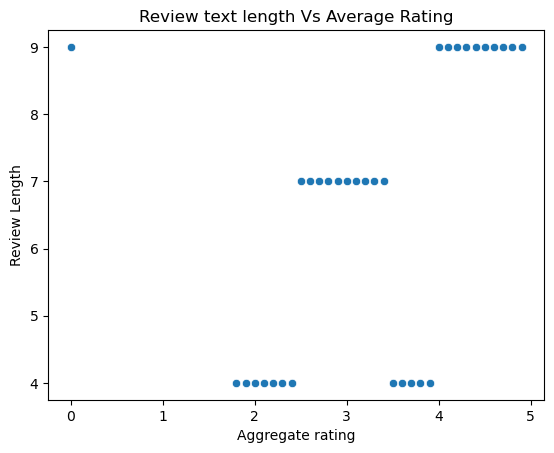

In [122]:
# rating vs review length
sns.scatterplot(x=Rating_Review_lengith_df['Aggregate rating'],y=Rating_Review_lengith_df['Review Length']);


plt.title('Review text length Vs Average Rating')
plt.show();

In [71]:
import scipy.stats as stats
corr, pval = stats.spearmanr(Rating_Review_lengith_df['Aggregate rating'], Rating_Review_lengith_df['Review Length'])
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: 0.6184238739981055
p-value: 0.00012522124990312867


 **The Spearman's correlation coefficient is 0.618 which is  between 0.41 and 0.7 , so there is a strong correlation, so there is a strong correlation between average rating and Review length.**

## Task 2: Votes Analysis

**Q2: Analyze if there is a correlation between the number of votes and the rating of  restaurant.**

In [69]:
# average votes and ratings of restaurants
vote_raing_df=df.groupby('Restaurant Name')[['Votes','Aggregate rating']].mean()
vote_raing_df.head(20)

Votes  Aggregate rating
Restaurant Name                                  
#45                       209.0               3.6
#Dilliwaala6              124.0               3.7
#InstaFreeze                2.0               0.0
#OFF Campus               216.0               3.7
#Urban Café                49.0               3.3
#hashtag                    0.0               0.0
'Ohana                   1151.0               4.5
10 Downing Street         335.0               4.0
10 To 10 In Delhi          73.0               3.8
11th Avenue Cafe Bistro   377.0               4.1
12212                      80.0               3.5
13 Cafe                     0.0               0.0
145 Kala Ghoda           1606.0               4.2
17 Degree Food Service      1.0               0.0
17 Degrees                151.0               3.5
18 Degrees Resto Lounge  1566.0               3.6
19 Flavours Biryani        84.0               4.1
1911 - The Imperial       272.0               3.9
1911 Bar - The Imperial    10.0               3.2
1918 Bistro & Grill       339.0               4.4

Text(0.5, 1.0, 'The Number of votes Vs The rating of restaurant')

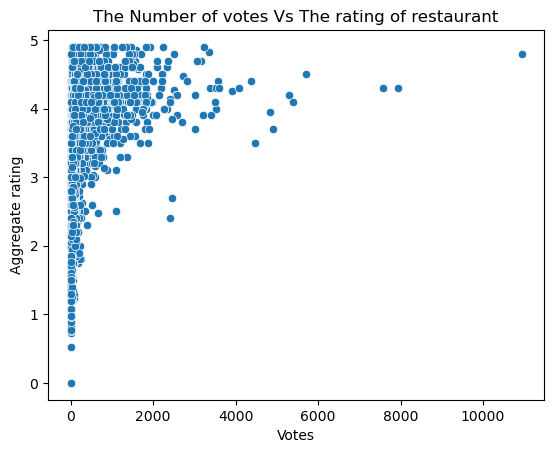

In [83]:
sns.scatterplot(x=vote_raing_df.Votes, y=vote_raing_df['Aggregate rating'])
plt.title('The Number of votes Vs The rating of restaurant')

In [73]:
corr, pval = stats.spearmanr(vote_raing_df['Aggregate rating'], vote_raing_df['Votes'])
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: 0.8647406973651054
p-value: 0.0


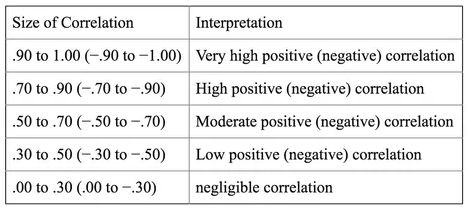
credit: Zakaria Jaadi

**Based on the above  correlation result and p-value, there is a high positive correlation between  aggregate rating and votes.**

# Task 3: Price Range vs. Online Delivery and Table Booking

**Q1: Analyze if there is a relationship between the price range and the availability of online delivery and table booking.**

In [74]:
#price-online delivery
price_online=df.groupby(['Price range','Has Online delivery']).size()
price_online=pd.DataFrame(price_online)
price_online.columns=['Restaurant_count']
price_online.reset_index(inplace=True)
price_online

Price range Has Online delivery  Restaurant_count
0            1                  No              3737
1            1                 Yes               700
2            2                  No              1827
3            2                 Yes              1286
4            3                  No               994
5            3                 Yes               411
6            4                  No               533
7            4                 Yes                53

<Axes: xlabel='Price range', ylabel='Restaurant_count'>

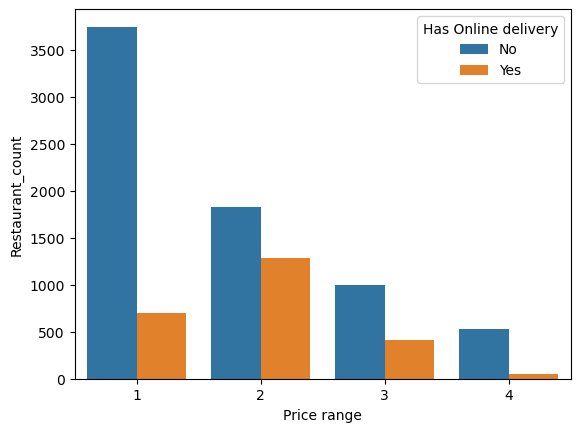

In [27]:
sns.barplot(x=price_online['Price range'],y=price_online['Restaurant_count'],hue=price_online['Has Online delivery'])

**From this analysis we can draw the following point:**

-  As price range decreases  the number of  restaurants those do and doesn't provide online delivery increases
  i.e. there is an inverse relationship

In [119]:
#price vs table booking
price_Table_Booking=df.groupby(['Price range','Has Table booking']).size()
price_Table_Booking=pd.DataFrame(price_Table_Booking)
price_Table_Booking.columns=['Restaurant_count']
price_Table_Booking.reset_index(inplace=True)
price_Table_Booking

Price range Has Table booking  Restaurant_count
0            1                No              4443
1            1               Yes                 1
2            2                No              2874
3            2               Yes               239
4            3                No               764
5            3               Yes               644
6            4                No               312
7            4               Yes               274

<Axes: xlabel='Price range', ylabel='Restaurant_count'>

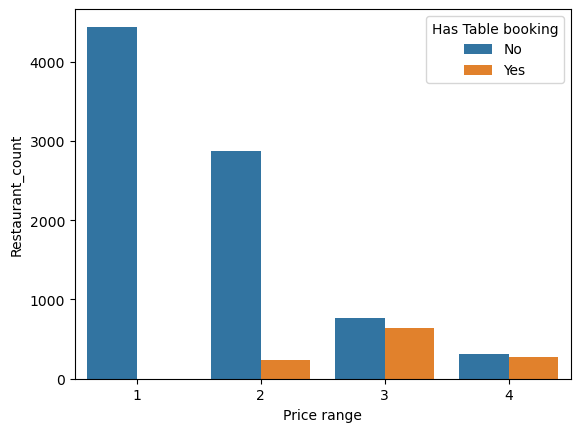

In [120]:
sns.barplot(x=price_Table_Booking['Price range'],y=price_Table_Booking['Restaurant_count'],hue=price_Table_Booking['Has Table booking'])

**From this analysis we can draw the following points:**

- As the price range decreases  the number of  restaurants that have table booking increases
  i.e. there is an inverse relationship

- Generally, high-price range restaurants have table booking

**Q2: Determine if higher-priced restaurants are more likely to offer these services.**

**Based on the above two bar charts,**

- High price range restaurants offer table booking 

- Restaurants with price range 2 offer the highest online delivery, so price range and online delivery don't correlate positively.

# **Conclusion AND Recommendation**

## **Conclusion**

**From the analysis, several key insights were discovered:**

- Cuisine Trends: North Indian, Chinese, and Fast Food are the top three cuisines, with over 64.8% of restaurants serving at least one of them. Only 2.46% serve all three.

- Geographic Concentration: Most restaurants are located in India (especially New Delhi) and the USA, with New Delhi alone contributing over 5,400 restaurants.

- Ratings & Delivery: Restaurants that offer online delivery have a higher average rating (3.25) compared to those without (2.46). The highest ratings are found in cities like Inner City and Quezon City.

- Price Range: Over 46% of restaurants fall into the lowest price range. Higher-priced restaurants are more likely to offer table booking, while online delivery is most common at mid-range (price range 2).

- Customer Feedback: There is a strong positive correlation between:

> - Aggregate rating and review length (ρ = 0.618)

> - Aggregate rating and votes received (ρ = 0.86)

- Cuisine Combinations: Popular pairs like North Indian & Chinese dominate in frequency, while combinations like Ramen & Sushi and Börek & Desserts yield higher average ratings.

- Global Spread: Although restaurants are globally distributed, the highest concentrations are found in India, USA, Canada, and Australia.creases.


## **Recommendation**
Based on the insights:

1. Target Cuisine Trends: Food businesses expanding in India or the USA should consider offering North Indian, Chinese, or Fast Food items to align with demand.

2. Focus on Online Services: Since online delivery correlates with higher ratings, restaurants should invest in optimizing their online delivery experience to attract and retain customers.

3. Encourage Review Engagement: Higher review counts and longer reviews correlate with better ratings. Incentivizing customer feedback could enhance visibility and trust.

4. Price-Related Strategies:

> * Lower-priced restaurants should leverage online delivery as a core service.

> * Higher-priced restaurants should offer table booking to maintain customer expectations.

5. Data Coverage Expansion: The current dataset is biased toward a few countries. A more globally diverse dataset would enable more inclusive and representative analysis in future projects.

